# 1 - Exploratory Data Analysis

## Import Librairies, load data, clean data

In [1]:
# importing libraries

import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# data cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filter for US Data Analyst Roles

In [2]:
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

### Top 10 Work Locations

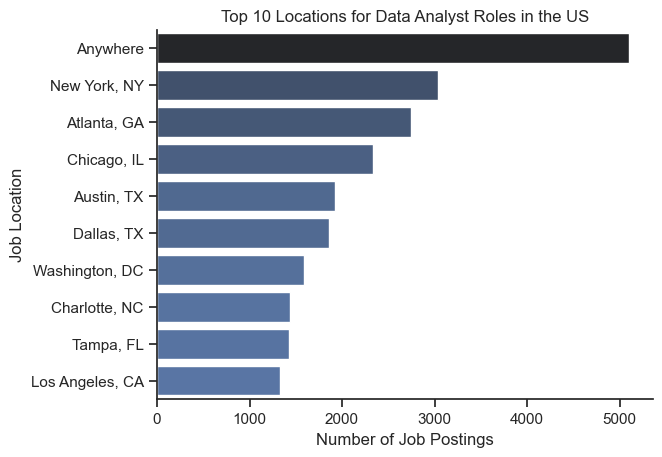

In [9]:
df_location_plot = df_DA_US["job_location"].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_location_plot, x="count", y="job_location", hue="count", palette="dark:b_r", legend=False)
sns.despine()
plt.title("Top 10 Locations for Data Analyst Roles in the US")
plt.xlabel("Number of Job Postings")
plt.ylabel("Job Location")
plt.show()

### Proportion of Work from Home, Degree Required and Health Insurance

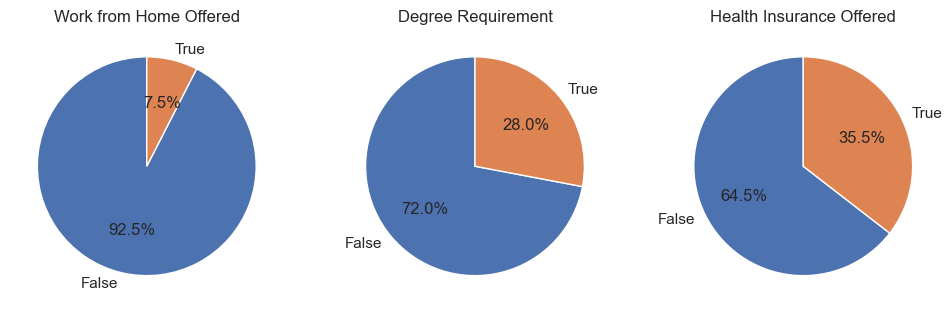

In [11]:
# rename columns
dict_column = {
    "job_work_from_home": "Work from Home Offered",
    "job_no_degree_mention": "Degree Requirement",
    "job_health_insurance": "Health Insurance Offered"    
}

# plot three pie charts

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12, 5)

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=["False", "True"], autopct="%1.1f%%", startangle=90)
    ax[i].set_title(title)

# clean the plots
plt.show()

### Top 10 Companies Offering Data Analyst Roles

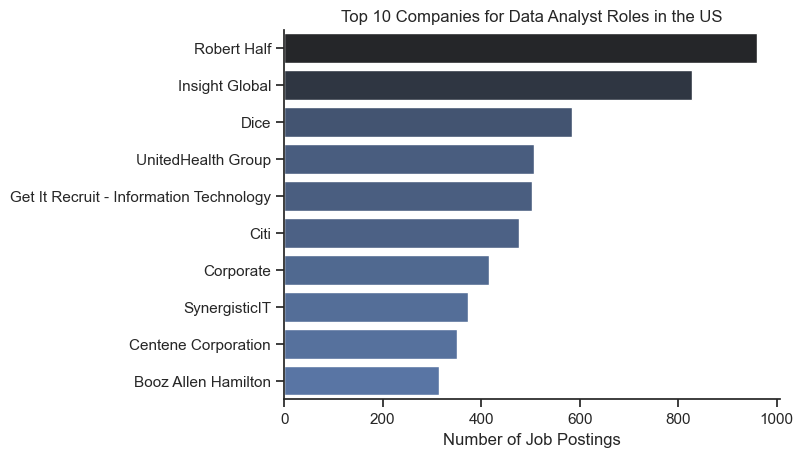

In [14]:
df_company_plot = df_DA_US["company_name"].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_company_plot, x="count", y="company_name", hue="count", palette="dark:b_r", legend=False)
sns.despine()
plt.title("Top 10 Companies for Data Analyst Roles in the US")
plt.xlabel("Number of Job Postings")
plt.ylabel("")
plt.show()

### When are Data Analysts in Demand

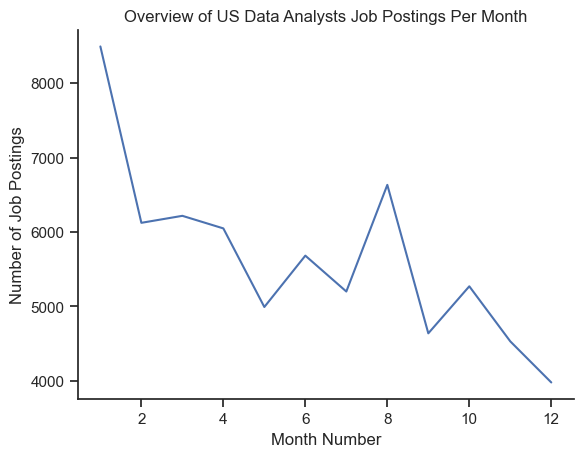

In [41]:
# create a new month column

df_DA_US["job_posted_month_no"] = df_DA_US["job_posted_date"].dt.month

# create a df grouped by month
df_DA_US_grouped_month = df_DA_US.groupby("job_posted_month_no").agg(
    count = ("job_posted_month_no", "count")
)
# plot the graph

sns.lineplot(data=df_DA_US_grouped_month, x="job_posted_month_no", y="count", legend=False)
sns.despine()
plt.title("Overview of US Data Analysts Job Postings Per Month")
plt.xlabel("Month Number")
plt.ylabel("Number of Job Postings")
plt.show()


# !! Check for more stuff not related to Data Analysts and US !!